# Оптимизация золотодобывающего производства

**Задача**

В распоряжении данные с параметрами добычи и очистки золотосодержащей руды. Необходимо подготовить прототип модели обучения для эффективной работы промышленных предприятий.

**Ход решения**

- Подготовить данные
- Провести исследовательский анализ данных
- Построить и обучить модель

# 1. Подготовка данных

## 1.1. Открытие файлов

In [63]:
# подгружаю необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.dummy import DummyRegressor


In [116]:
# открываю файлы
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
print('data_train', data_train.shape)
print('data_test', data_test.shape)
print('data_full', data_full.shape)

data_train (14149, 87)
data_test (5290, 53)
data_full (19439, 87)


In [117]:
display(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [118]:
display(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [119]:
display(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


## 1.2. Проверка расчета эффективности

In [120]:
list_columns = data_train.columns
print(*list_columns, sep='\n')
print(len(list_columns))

date
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.calculation.sulfate_to_au_concentrate
rough

In [121]:
# чтобы не искать в списке названий необходимые значения, отберу их циклом
concentrate_au = []
feed_au = []
tail_au = []
recovery = []
for i in list_columns:
    if 'concentrate_au' in i:
        concentrate_au.append(i)
    elif 'feed_au' in i:
        feed_au.append(i)
    elif 'tail_au' in i:
        tail_au.append(i)
    elif 'recovery' in i:
        recovery.append(i)
print('concentrate_au', concentrate_au)
print()
print('feed_au', feed_au)
print()
print('tail_au', tail_au)
print()
print('recovery', recovery)

concentrate_au ['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au']

feed_au ['rougher.input.feed_au']

tail_au ['final.output.tail_au', 'primary_cleaner.output.tail_au', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_au']

recovery ['final.output.recovery', 'rougher.output.recovery']


In [122]:
# проверяю один столбец и по нему проверю, правильно ли будет работать функция
c1 = data_train.loc[58,'rougher.output.concentrate_au']
f1 = data_train.loc[58,'rougher.input.feed_au']
t1 = data_train.loc[58,'rougher.output.tail_au']
print(c1 * (f1 - t1) / (f1 * (c1 - t1)) * 100)

79.74675260876867


In [123]:
def check_recovery(row):
    c = row['rougher.output.concentrate_au'] # доля золота в концентрате после флотации rougher.output.concentrate_au
    f = row['rougher.input.feed_au'] # доля золота в сырье до флотации rougher.input.feed_au
    t = row['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации rougher.output.tail_au
    recovery = c * (f - t) / (f * (c - t)) * 100
    return recovery

data_train['check_recovery'] = data_train.apply(check_recovery, axis=1)
print(data_train.loc[58,'check_recovery'])

79.74675260876867


In [124]:
data_train = data_train[~data_train['rougher.output.recovery'].isna()]
print(data_train['check_recovery'].isna().sum())

0


In [125]:
# функция работает правильно, следовательно нахожу значения MAE для существующих и полученных значения
target = data_train['rougher.output.recovery']
predictions = data_train['check_recovery']

MAE = mean_absolute_error(target, predictions)
print(MAE)

9.682896147825551e-15


Так как МАЕ минимальное, следовательно, вычисления по формуле максимально точны.

Далее проверяю, каких признаков не хватает в тесте и чтобы их восстановить, по данным столбца date заменяю строки с пропусками из датасета full. Индесами становятся значения дат (поэтому в предобработке данных нужно будет привести их к формату даты и времени). Пропуски в data_full так же нужно заменить на что-то.

## 1.3. Проверка признаков, недоступных в тестовой выборке

In [126]:
# rougher.output.recovery
# получаю названия столбцов
list_columns_full = data_full.columns
list_columns_train = data_train.columns
list_columns_test = data_test.columns
print(data_full.shape)
print(data_train.shape)
print(data_test.shape)
print()

# создаю список названий, которых не хватает в тесте
# и проверяю количество недостающих с разностью полных и тестовых
list_missing_test = [i for i in list_columns_full if i not in list_columns_test]
print(len(list_missing_test))
print(len(list_columns_full) - len(list_columns_test))

(19439, 87)
(14149, 88)
(5290, 53)

34
34


В трейне на 1 столбец больше, так как мы проверяли recovery и добавляли столбец с новыми значениями

In [127]:
print(*list_missing_test, sep='\n')

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Все недостающие признаки в тестовой выборки - это этап output

## 1.4. Предобработка данных

In [128]:
print(data_full.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


Все пропуски в данных заменяю на предыдущие значения, имеющиеся в данных. Между каждой строкой разность во времени составляет мгновение, вряд ли за это время изменятся значения концентрации или еще чего-то. Поэтому заполняю пропуски методом fillna с аргументом method='pad', означающим "заполнить предыдущим".

In [129]:
data_full = data_full.fillna(method='pad')
print(data_full.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [130]:
data_train = data_train.fillna(method='pad')
print(data_train.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
check_recovery                                0
Length: 88, dtype: int64


In [131]:
data_test = data_test.fillna(method='pad')
print(data_test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [132]:
# в тесте недостающие столбцы беру из data_full, где индексами будут значения date
# приведу сначала строковый тип данных в date к формату даты и времени
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
print(data_full['date'].dtypes)

datetime64[ns]


Чтобы в data_test получить недостающие столбцы, беру строки из data_full с индексами-датами

In [133]:
test_date = data_test['date']
print(test_date)

0      2016-09-01 00:59:59
1      2016-09-01 01:59:59
2      2016-09-01 02:59:59
3      2016-09-01 03:59:59
4      2016-09-01 04:59:59
               ...        
5285   2017-12-31 19:59:59
5286   2017-12-31 20:59:59
5287   2017-12-31 21:59:59
5288   2017-12-31 22:59:59
5289   2017-12-31 23:59:59
Name: date, Length: 5290, dtype: datetime64[ns]


In [134]:
# data_test_new = data_full.query('date in @test_date')
# print(data_test_new.shape)

In [135]:
target_full = data_full[['date','rougher.output.recovery', 'final.output.recovery']]
display(target_full)

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016
...,...,...,...
19434,2018-08-18 06:59:59,89.574376,73.755150
19435,2018-08-18 07:59:59,87.724007,69.049291
19436,2018-08-18 08:59:59,88.890579,67.002189
19437,2018-08-18 09:59:59,89.858126,65.523246


In [136]:
data_test_new = data_test.merge(target_full, how='left', on='date')
print(data_test_new.shape)
display(data_test_new)

(5290, 55)


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,95.172585,68.919891
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,94.575036,68.440582
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,92.599042,68.061186


In [137]:
data_test_new.shape

(5290, 55)

In [138]:
data_train_new = data_train[data_test_new.columns]
display(data_train_new)
print(data_train_new.shape)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,73.755150
14145,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,69.049291
14146,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,67.002189
14147,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246


(14149, 55)


In [139]:
# проверяю на дубликаты
data_full.duplicated().sum()

0

**Вывод**

На первом этапе:
- были прочитаны данные 
- проверено, верно ли расчитана эффективность rougher.output.recovery 
        для этого была написана функция с формулой эффективности 
        recovery = c * (f - t) / (f * (c - t)) * 100, 
        и в нее были подставлены значения:
        c = rougher.output.concentrate_au - доля золота в концентрате после флотации rougher.output.concentrate_au
        f = rougher.input.feed_au - доля золота в сырье до флотации rougher.input.feed_au
        t = rougher.output.tail_au - доля золота в отвальных хвостах после флотации rougher.output.tail_au
- проверены недостающие признаки в data_test - это столбцы этапа output
- проведена предобработка данных: 
        * замена пропусков на предыдущие существующие значения во всех трех выборках
        * заполнение недостающих столбцов в data_test методом merge по столбцу date 
        * проверка отсутствия дубликатов

# 2. Анализ данных

## 2.1. Изменение концентрации металлов на различных этапах отчиски

In [88]:
# рассмотрю 3 металла на гистограмме для всех этапов 
concentrate_au = []
concentrate_ag = []
concentrate_pb = []
for i in list_columns:
    if 'concentrate_au' in i:
        concentrate_au.append(i)
    elif 'concentrate_ag' in i:
        concentrate_ag.append(i)
    elif 'concentrate_pb' in i:
        concentrate_pb.append(i)
print(*concentrate_au, sep='\n')
print()
print(*concentrate_ag, sep='\n')
print()
print(*concentrate_pb, sep='\n')

final.output.concentrate_au
primary_cleaner.output.concentrate_au
rougher.output.concentrate_au

final.output.concentrate_ag
primary_cleaner.output.concentrate_ag
rougher.output.concentrate_ag

final.output.concentrate_pb
primary_cleaner.output.concentrate_pb
rougher.output.concentrate_pb


In [89]:
print(data_full['final.output.concentrate_pb'].max())

17.031899460483757


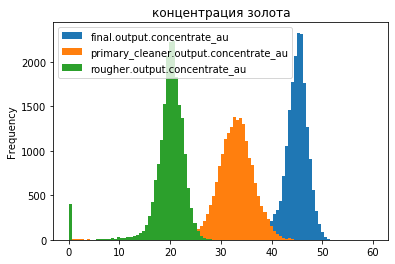

In [90]:
# концентрация золота
data_full.plot(y=['final.output.concentrate_au',
                  'primary_cleaner.output.concentrate_au',
                  'rougher.output.concentrate_au'], kind='hist', bins=100, range=(0,60))
plt.title('концентрация золота')
plt.show()

Концентрация золота растет от этапа флотации к этапу первой очистки и к этапу финального концентрата

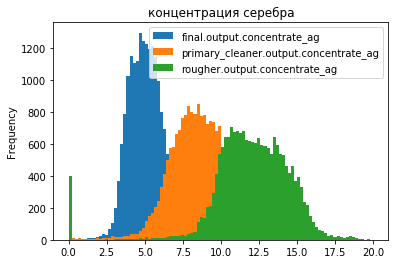

In [91]:
# концентрация золота
data_full.plot(y=['final.output.concentrate_ag',
                  'primary_cleaner.output.concentrate_ag',
                  'rougher.output.concentrate_ag'], kind='hist', bins=100, range=(0,20))
plt.title('концентрация серебра')
plt.show()

Концентрация серебра наоборот падает от этапа флотации к финальному концентрату

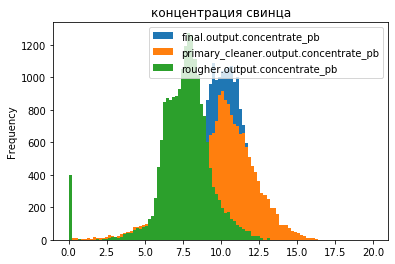

In [92]:
# концентрация золота
data_full.plot(y=['final.output.concentrate_pb',
                  'primary_cleaner.output.concentrate_pb',
                  'rougher.output.concentrate_pb'], kind='hist', bins=100, range=(0,20))
plt.title('концентрация свинца')
plt.show()

Концентрация свинца примерно одинаковая на трех этапах, но меньше на первом этапе флотации

**Вывод**

Концентрация золота растет от этапа флотации к этапу первой очистки и к этапу финального концентрата.

Концентрация серебра наоборот падает от этапа флотации к финальному концентрату.

Концентрация свинца примерно одинаковая на трех этапах, но меньше на первом этапе флотации.

## 2.2. Распределение размеров гранул сырья на обучающей и тестовых выборках

In [93]:
# рассмотрю 3 металла на гистограмме для всех этапов 
feed_size = []
for i in list_columns:
    if 'feed_size' in i:
        feed_size.append(i)
print(*feed_size, sep='\n')

primary_cleaner.input.feed_size
rougher.input.feed_size


In [94]:
data_full['rougher.input.feed_size'].median()

54.65726762443965

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


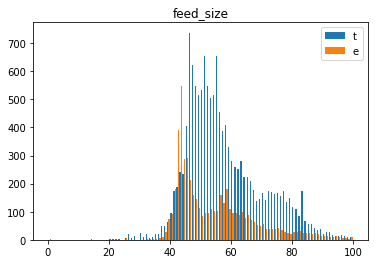

In [95]:
# буду рассматривать rougher.input.feed_size, так как это сырье на первом этапе - флотации
plt.hist([data_train['rougher.input.feed_size'], data_test_new['rougher.input.feed_size']], bins=100, range=(0,100))
plt.title('feed_size')
plt.legend('train')
plt.legend('test')
plt.show()

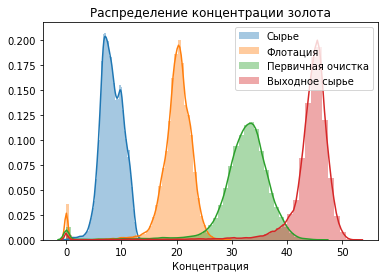

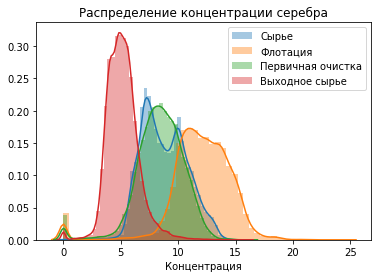

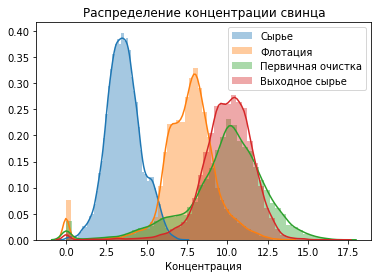

In [96]:
stages = ['rougher.input.feed_', 
          'rougher.output.concentrate_', 
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_']  

def concentrates (metal):
    for stage in stages:
        stage += metal
        sns.distplot(data_full[stage])
    plt.legend(['Сырье', 'Флотация', 'Первичная очистка', 'Выходное сырье'])
    plt.xlabel("Концентрация")
    
concentrates('au')
plt.title("Распределение концентрации золота")
plt.show()
concentrates('ag')
plt.title("Распределение концентрации серебра")
plt.show()
concentrates('pb')
plt.title("Распределение концентрации свинца")
plt.show()

**Вывод**

Так как распределения находятся в одной области, следовательно, выборки готовы для машинного обучения.

## 2.3. Исследование суммарных концентраций веществ на разных стадиях.

In [97]:
print(*concentrate_au, sep='\n')
print()
print(*concentrate_ag, sep='\n')
print()
print(*concentrate_pb, sep='\n')

final.output.concentrate_au
primary_cleaner.output.concentrate_au
rougher.output.concentrate_au

final.output.concentrate_ag
primary_cleaner.output.concentrate_ag
rougher.output.concentrate_ag

final.output.concentrate_pb
primary_cleaner.output.concentrate_pb
rougher.output.concentrate_pb


In [98]:
total_rougher_au = data_full['rougher.output.concentrate_au'].sum()
total_primary_au = data_full['primary_cleaner.output.concentrate_au'].sum()
total_final_au = data_full['final.output.concentrate_au'].sum()
print('ЗОЛОТО')
print('сырье',total_rougher_au)
print('черновой концентрат',total_primary_au)
print('финальный концентрат',total_final_au)

total_rougher_ag = data_full['rougher.output.concentrate_ag'].sum()
total_primary_ag = data_full['primary_cleaner.output.concentrate_ag'].sum()
total_final_ag = data_full['final.output.concentrate_ag'].sum()
print('СЕРЕБРО')
print('сырье',total_rougher_ag)
print('черновой концентрат',total_primary_ag)
print('финальный концентрат',total_final_ag)

total_rougher_pb = data_full['rougher.output.concentrate_pb'].sum()
total_primary_pb = data_full['primary_cleaner.output.concentrate_pb'].sum()
total_final_pb = data_full['final.output.concentrate_pb'].sum()
print('СВИНЕЦ')
print('сырье',total_rougher_pb)
print('черновой концентрат',total_primary_pb)
print('финальный концентрат',total_final_pb)

ЗОЛОТО
сырье 384347.9107114744
черновой концентрат 624369.0245287112
финальный концентрат 856803.3350786205
СЕРЕБРО
сырье 233166.1271965796
черновой концентрат 164111.9706227808
финальный концентрат 100468.27426143162
СВИНЕЦ
сырье 147858.3274961977
черновой концентрат 190702.74320765
финальный концентрат 193978.30888732593


In [99]:
feeds = {'au':[total_rougher_au, total_primary_au, total_final_au], 
        'ag':[total_rougher_ag, total_primary_ag, total_final_ag], 
        'pb':[total_rougher_pb, total_primary_pb, total_final_pb]} 
 
df_feeds = pd.DataFrame(feeds, index =['сырье', 'черновой концентрат', 'финальный концентрат'])
display(df_feeds)

,au,ag,pb
сырье,384347.910711,233166.127197,147858.327496
черновой концентрат,624369.024529,164111.970623,190702.743208
финальный концентрат,856803.335079,100468.274261,193978.308887


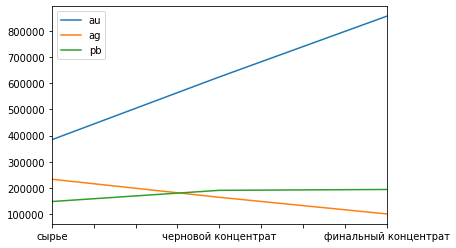

In [100]:
df_feeds.plot()
plt.show()

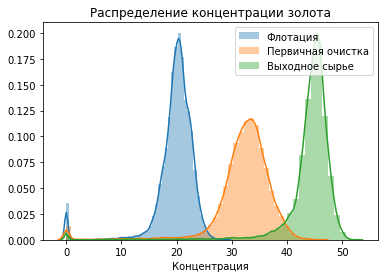

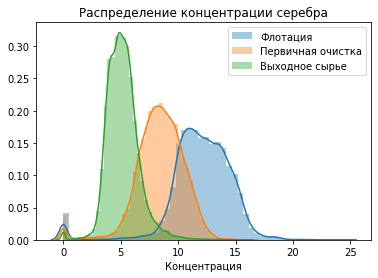

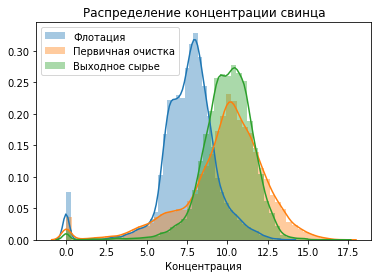

In [101]:
#определим параметры этапов обработки
stages = ['rougher.output.concentrate_', 
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_']  

def feeds(metal):
    for stage in stages:
        stage += metal
        sns.distplot(data_full[stage])
    plt.legend(['Флотация', 'Первичная очистка', 'Выходное сырье'])
    plt.xlabel("Концентрация")
    
feeds('au')
plt.title("Распределение концентрации золота")
plt.show()
feeds('ag')
plt.title("Распределение концентрации серебра")
plt.show()
feeds('pb')
plt.title("Распределение концентрации свинца")
plt.show()

**Вывод**

    У золота растет концентрация от первого к последнему этапу, что логично, так как металлы отчищаются, масса сырья уменьшается, а чистое вещество сохраняется.
    То же самое происходит и со свинцом, а вот у серебра наоборот концентрация уменьшается.

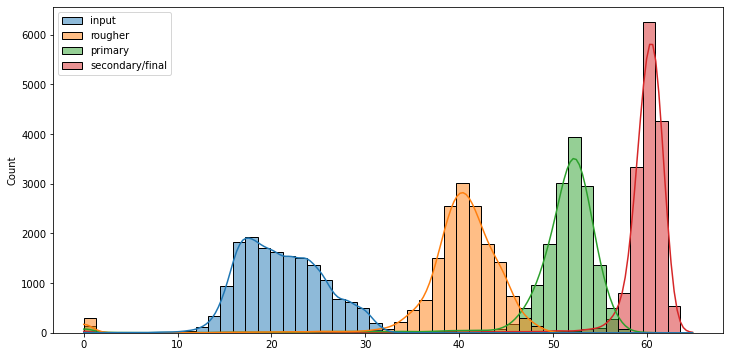

# 3. Построение модели

## 3.1. Функция вычисления для вычисления итоговой sMAPE

In [140]:
# сначала пишу функцию smape, 
def smape(target, predictions):
    summa = 0
    target = np.array(target)
    for i in range(len(target)):
        if (target[i] != 0) or (predictions[i] != 0):
            summa += 2 * abs(target[i]-predictions[i]) / (abs(target[i])+abs(predictions[i]))
    smape = 1/(len(target)+1) * summa * 100
    return smape

## 3.2. Кроссвалидация и выбор лучшей модели

In [103]:
STATE = 12345

In [141]:
features_train_rougher = data_train_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = data_train_new['rougher.output.recovery']

features_test_rougher = data_test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = data_test_new['rougher.output.recovery']

features_train_final = data_train_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_final = data_train_new['final.output.recovery']

features_test_final = data_test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = data_test_new['final.output.recovery']

In [142]:
features_train_rougher.shape

(14149, 52)

In [201]:
# константная модель для rougher
dummy_regressor_rougher = DummyRegressor(strategy='median') 
dummy_regressor_rougher.fit(features_train_rougher, target_train_rougher) 
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test_rougher) 
smape_dummy_rougher = smape(target_test_rougher, dummy_rougher_pred) 
print(smape_dummy_rougher)

8.724522955405769


In [202]:
# константная модель для final
dummy_regressor_final = DummyRegressor(strategy='median') 
dummy_regressor_final.fit(features_train_final, target_train_final) 
dummy_final_pred = dummy_regressor_final.predict(features_test_final) 
smape_dummy_final = smape(target_test_final, dummy_final_pred) 
print(smape_dummy_final)

9.294649368550182


************

In [184]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [196]:
data_test_new = data_test.dropna()#fillna(method='pad')
data_train_new = data_train.dropna()#fillna(method='pad')

In [197]:
target_full = data_full[['date','rougher.output.recovery', 'final.output.recovery']]
data_test_new = data_test_new.merge(target_full, how='left', on='date')

In [198]:
data_train_new = data_train_new[data_test_new.columns]

In [199]:
features_train_rougher = data_train_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = data_train_new['rougher.output.recovery']

features_test_rougher = data_test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = data_test_new['rougher.output.recovery']

features_train_final = data_train_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_final = data_train_new['final.output.recovery']

features_test_final = data_test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = data_test_new['final.output.recovery']

In [192]:
# трейн
linear = LinearRegression()

scores = cross_val_score(linear,
                         features_train_rougher,
                         target_train_rougher,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
print((-1)*scores.mean())

13.22656847638351


In [191]:
# трейн
forest = RandomForestRegressor(n_estimators=40, random_state=STATE)

scores = cross_val_score(forest, 
                         features_train_rougher, 
                         target_train_rougher,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
print((-1)*scores.mean())

14.78373660198423


************

In [190]:
# трейн
tree = DecisionTreeRegressor(random_state=STATE)

scores = cross_val_score(tree,
                         features_train_rougher,
                         target_train_rougher,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
print((-1)*scores.mean())

22.956318427471704


In [146]:
scores

array([-20.4447587 , -17.82418648, -17.44743614])

In [47]:
# трейн
forest = RandomForestRegressor(n_estimators=40, random_state=STATE)

scores = cross_val_score(forest, 
                         features_train_rougher, 
                         target_train_rougher,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
print((-1)*scores.mean())

15.565802372755753


In [48]:
# трейн
linear = LinearRegression()

scores = cross_val_score(linear,
                         features_train_rougher,
                         target_train_rougher,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
print((-1)*scores.mean())

17.159384731803097


Каждая модель показала наилучшие результаты на трейне, все они выше метрики константой модели:

    DecisionTreeRegressor 18.572127107778098
    RandomForestRegressor 15.565802372755753
    LinearRegression 17.159384731803097
    
Но лучше всех себя показала модель DecisionTreeRegressor, поэтому именно ее и будем проверять на тесте

In [193]:
features_train = data_train_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = data_test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

target_train_rougher = data_train_new['rougher.output.recovery']
target_train_final = data_train_new['final.output.recovery']

target_test_rougher = data_test_new['rougher.output.recovery']
target_test_final = data_test_new['final.output.recovery']

In [50]:
# трейн
tree = DecisionTreeRegressor(random_state=STATE)

scores = cross_val_score(tree,
                         features_train,
                         target_train_rougher,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
smape_rougher_train = (-1)*scores.mean()
print(smape_rougher_train)

18.572127107778098


In [51]:
# тест
tree = DecisionTreeRegressor(random_state=STATE)

scores = cross_val_score(tree,
                         features_test,
                         target_test_rougher,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
smape_rougher_test = (-1)*scores.mean()
print(smape_rougher_test)

21.17378378157816


In [52]:
# трейн
tree = DecisionTreeRegressor(random_state=STATE)

scores = cross_val_score(tree,
                         features_train,
                         target_train_final,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
smape_final_train = (-1)*scores.mean()
print(smape_final_train)

20.297626055510644


In [53]:
# тест
tree = DecisionTreeRegressor(random_state=STATE)

scores = cross_val_score(tree,
                         features_test,
                         target_test_final,
                         scoring=make_scorer(smape, greater_is_better=False),
                         cv=3
                        )
smape_final_test = (-1)*scores.mean()
print(smape_final_test)

19.265109013043062


In [54]:
total_smape_train = 0.25 * smape_rougher_train + 0.75 * smape_final_train
print('total_smape_train', total_smape_train)

total_smape_test = 0.25 * smape_rougher_test + 0.75 * smape_final_test
print('total_smape_test', total_smape_test)

total_smape_train 19.866251318577508
total_smape_test 19.74227770517684


Лучше всего себя показала модель DecisionTreeRegressor, с помощью нее посчитала итоговую smape, она получилась равная 

    total_smape_train 19.866251318577508
    total_smape_test 19.74227770517684

### КОД ЛУЧШИХ МОДЕЛЕЙ

In [58]:
my_scorer=make_scorer(smape, greater_is_better=False)

model_forest = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=STATE)

scores_rougher_forest = abs(cross_val_score(
    model_forest, features_train, target_train_rougher, cv=5, scoring=my_scorer).mean())  

print('sMAPE для модели случайного леса для чернового концентрата:', scores_rougher_forest)

scores_final_forest = abs(cross_val_score(
    model_forest, features_train, target_train_final, cv=5, scoring=my_scorer).mean())

print('sMAPE для модели случайного леса для финального концентрата:', scores_final_forest)

final_smape_forest = 0.25 * scores_rougher_forest + 0.75 * scores_final_forest

print('Итоговое sMAPE для модели случайного леса:', final_smape_forest)
%time


# посчитаем sMAPE на тестовой выборке, вызвав функцию cross_value_score с пятью блоками, 
# для модели случайного леса для чернового и финального концентрата и итоговый sMAPE

model_forest = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=STATE)

scores_rougher_forest_test = abs(cross_val_score(
    model_forest, features_test, target_test_rougher, cv=5, scoring=my_scorer).mean())  

print('sMAPE для модели случайного леса для чернового концентрата на тестовой выборке:', scores_rougher_forest_test)

scores_final_forest_test = abs(cross_val_score(
    model_forest, features_test, target_test_final, cv=5, scoring=my_scorer).mean())

print('sMAPE для модели случайного леса для финального концентрата на тестовой выборке:', scores_final_forest_test)

final_smape_forest_test = 0.25 * scores_rougher_forest_test + 0.75 * scores_final_forest_test

print('Итоговое sMAPE для модели случайного леса на тестовой выборке:', final_smape_forest_test)
%time

sMAPE для модели случайного леса для чернового концентрата: 11.045357189677087
sMAPE для модели случайного леса для финального концентрата: 10.140999309253342
Итоговое sMAPE для модели случайного леса: 10.367088779359278
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 13.8 µs
sMAPE для модели случайного леса для чернового концентрата на тестовой выборке: 11.898830751034293
sMAPE для модели случайного леса для финального концентрата на тестовой выборке: 11.298167847039739
Итоговое sMAPE для модели случайного леса на тестовой выборке: 11.44833357303838
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


*******

# 4. Общий вывод

**Подготовка данных**

На первом этапе:
- были прочитаны данные 
- проверено, верно ли расчитана эффективность rougher.output.recovery 
        для этого была написана функция с формулой эффективности 
        recovery = c * (f - t) / (f * (c - t)) * 100, 
        и в нее были подставлены значения:
        c = rougher.output.concentrate_au - доля золота в концентрате после флотации rougher.output.concentrate_au
        f = rougher.input.feed_au - доля золота в сырье до флотации rougher.input.feed_au
        t = rougher.output.tail_au - доля золота в отвальных хвостах после флотации rougher.output.tail_au
- проверены недостающие признаки в data_test - это столбцы этапа output
- проведена предобработка данных: 
        * замена пропусков на предыдущие существующие значения во всех трех выборках
        * заполнение недостающих столбцов в data_test, полученных из data_full по индекасам-датам из тестовой выборки
        * проверка отсутствия дубликатов
        
**Анализ данных**

Анализ концентрации металлов на разных этапах:

    Концентрация золота растет от этапа флотации к этапу первой очистки и к этапу финального концентрата.
    Концентрация серебра наоборот падает от этапа флотации к финальному концентрату.
    Концентрация свинца примерно одинаковая на трех этапах, но меньше на первом этапе флотации.
    
Анализ распределения размеров гранул сырья на тестовой и обучающей выборке:

    Распределения находятся в одной области, следовательно, следовательно, выборки готовы для машинного обучения
    
Анализ суммарной концентрации веществ на разных этапах:

    У золота растет концентрация от первого к последнему этапу, что логично, так как металлы отчищаются, масса сырья уменьшается, а чистое вещество сохраняется.
    То же самое происходит и со свинцом, а вот у серебра наоборот концентрация уменьшается.
    
**Построение модели**

Написала функцию расчета sMAPE, через нее кроссвалидацией прогнала три модели, но перед этим получила метрику на DummyRegressor, она получилась равная 8.626098625473407
    
Каждая модель показала наилучшие результаты на трейне, все они выше константной модели:

    DecisionTreeRegressor 18.572127107778098
    RandomForestRegressor 15.565802372755753
    LinearRegression 17.159384731803097
    
Но лучше всех себя показала модель DecisionTreeRegressor, поэтому именно ее и проверяла на тесте, она показала следующие результаты для smape_rougher и smape_final

    smape_rougher = 18.572127107778098
    smape_final = 20.297626055510644
    
И подставила эти значения в формулу итоговой sMAPE:

    total_smape = 19.866251318577508